In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Set random seed
np.random.seed(0)

Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py

In [2]:
data = pd.read_fwf("housing.data", header = None, names=["CRIM", "ZN", "INDUS", "CHAS", "NOX", 
                                                         "RM", "AGE", "DIS", "RAD", "TAX", 
                                                         "PTRATIO", "B", "LSTAT", "MEDV"])

### Data description from file
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per 10,000 dollars
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    lower status of the population
14. MEDV     Median value of owner-occupied homes in 1000 dollars


In [3]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
#Descriptive statistics
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
#Data preprocessing part 
#Check missing values
data.isnull().values.any()
#data.isnull().sum()
#no missing values

False

In [6]:
#View the summary of the data
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.716290,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.696228,4.332016,408.237154,18.455534,356.674032,12.653063,22.532806
std,2.653510,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,1.999689,1.417166,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,0.585700,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.073700,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.250895,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.107300,4.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,2.326718,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.112625,5.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,9.966540,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,9.222900,8.000000,711.000000,22.000000,396.900000,37.970000,50.000000


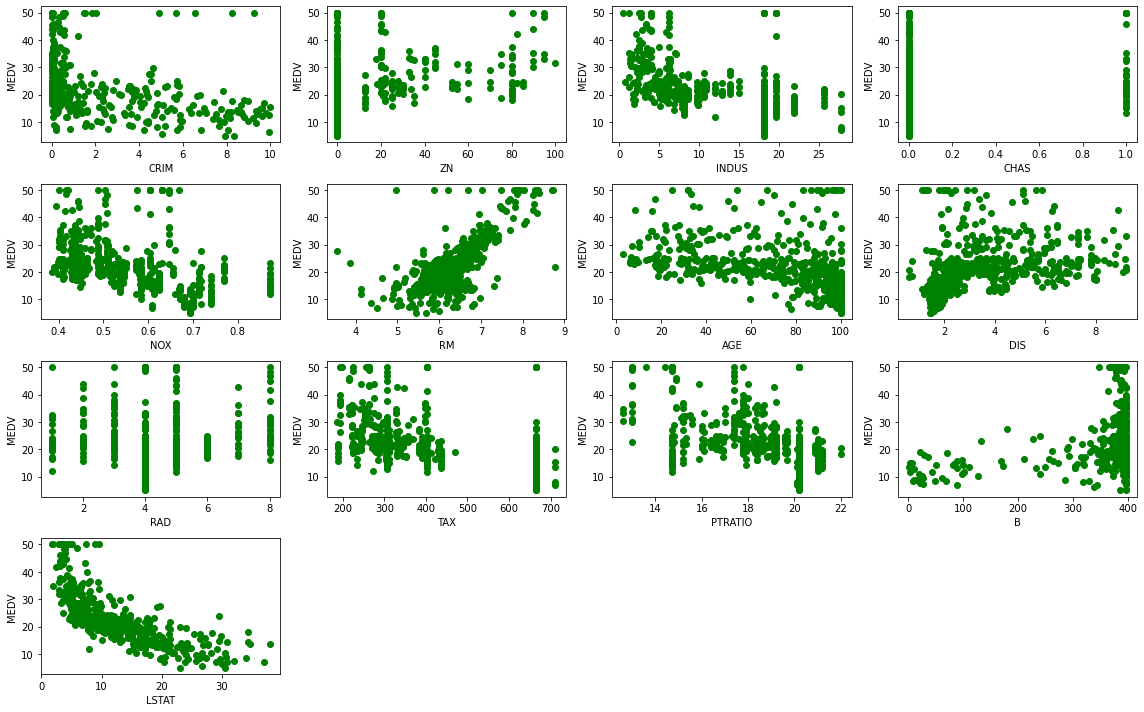

In [7]:
#Data Visualization Part
#Scatter plot

indx_length = len(data.columns)
indx_length = indx_length - 1

indx_length

fig = plt.figure(figsize=(16, 10)) 
vector_names = data.columns[0:13]

for i in range(0,indx_length):
    ax = fig.add_subplot(4, 4, i+1)
    plt.scatter(data.iloc[:, [i]], data.iloc[:,13], color='green')
    ax.set_xlabel(vector_names[i])
    ax.set_ylabel('MEDV')
    fig.tight_layout()
plt.show()

#plt.savefig("Scatterplots")
#The prices increase as the value of RM increases linearly, however, there are few outliers.
#The prices tend to decrease with an increase in LSTAT. However, the pattern doesn't follow exactly a linear line.

<AxesSubplot:>

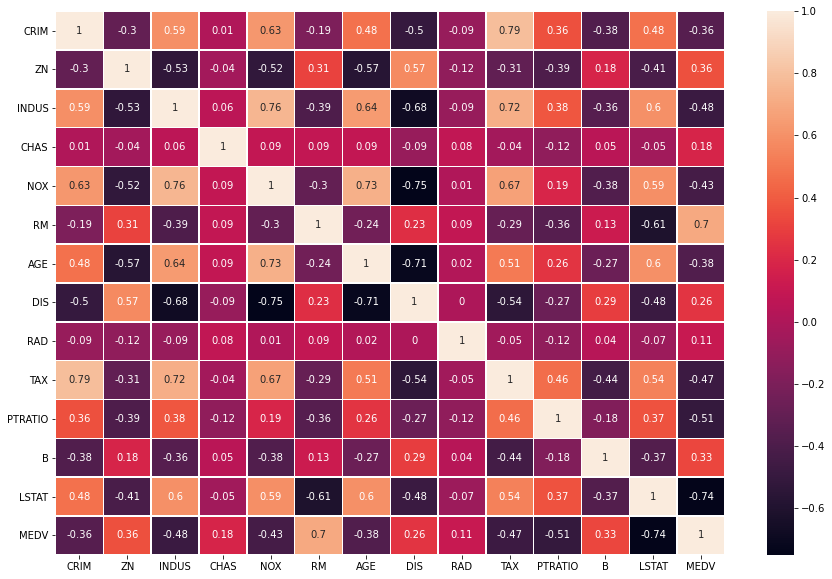

In [8]:
#Correlation matrix

correlation_matrix = data.corr().round(2)

fig, ax = plt.subplots(figsize=(15,10))

# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

#As it can be seen from the correlation matrix, RM has a strong positive correlation with MEDV (0.7), while
#LSTAT has a high negative correlation with MEDV(-0.74).


#check for the multicollinearity
#Moreover, it's essential to check features for multicollinearity in order to determine which features are 
#highly correlated with another ones. The features INDUS and TAX have a correlation of 0.72. Additionally, 
#CRIM and TAX have a correlation of 0.79. AGE and NOX have a correlation of 0.73. 
#These feature pairs are strongly correlated to each other. Thus, we should not select these features together 
#for training the model. 
#Similarly, features NOX and DIS have a high negative correlation of -0.75. INDUS and DIS have a negative 
#correlation of -0.68, and AGE and DIS = -0.71.


#therefore, the following variables such as AGE, NOX, INDUS are not to be included into the model.

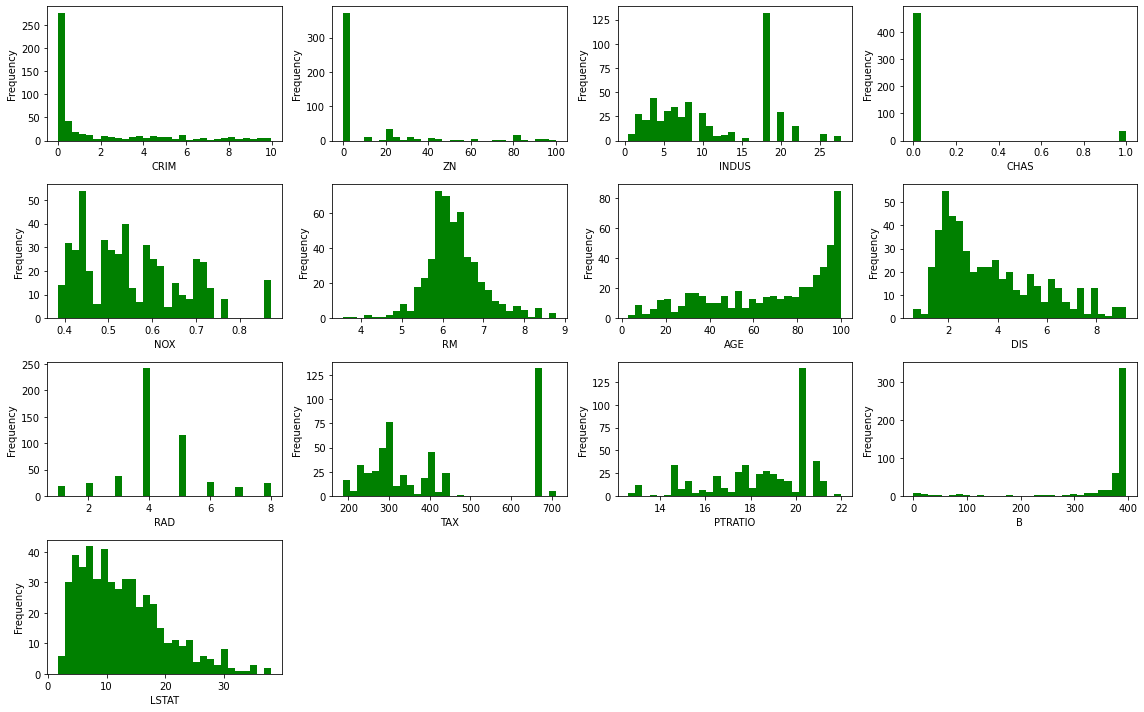

In [9]:
#Histogram of independent variables

fig = plt.figure(figsize=(16, 10)) 
vector_names = data.columns[0:13]

for i in range(0,indx_length):
    ax = fig.add_subplot(4, 4, i+1)
    plt.hist(data.iloc[:, i], bins = 30, color='green')
    ax.set_xlabel(vector_names[i])
    ax.set_ylabel('Frequency')
    fig.tight_layout()
plt.show()

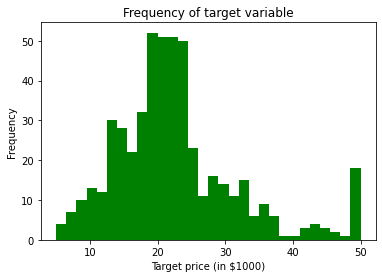

In [10]:
#Plot the distribution of the target variable MEDV
plt.hist(data.iloc[:, 13], bins = 30, color='green')
plt.xlabel('Target price (in $1000)')
plt.ylabel('Frequency')
plt.title("Frequency of target variable")
plt.show()

#As it can be seen, the values of MEDV are normally distributed with few outliers.

In [11]:
#Finding outliers using Z score
#Formula for Z score = (Observation — Mean)/Standard Deviation
#Find the outliers in the dataset without the 'Grade' column

data2 = data.loc[:, data.columns != 'MEDV']
z_scores = stats.zscore(data2)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = data2[filtered_entries]
new_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [12]:
#Predict the column 13 which is “MEDV - Median value of owner-occupied homes in $1000's” (target variable)

# split into input (X) and output (y) variables
data3 = data[filtered_entries]
x = new_df
y = data3.iloc[:,13]

In [13]:
#Find the columns containing only 0 for all rows
data3.loc[:, (data3 == 0).all()] #CHAS

,CHAS
0,0
1,0
2,0
3,0
4,0
...,...
501,0
502,0
503,0
504,0


In [14]:
#Removing CHAS from dataset
data3 = data3.drop(columns=['CHAS'])

<AxesSubplot:>

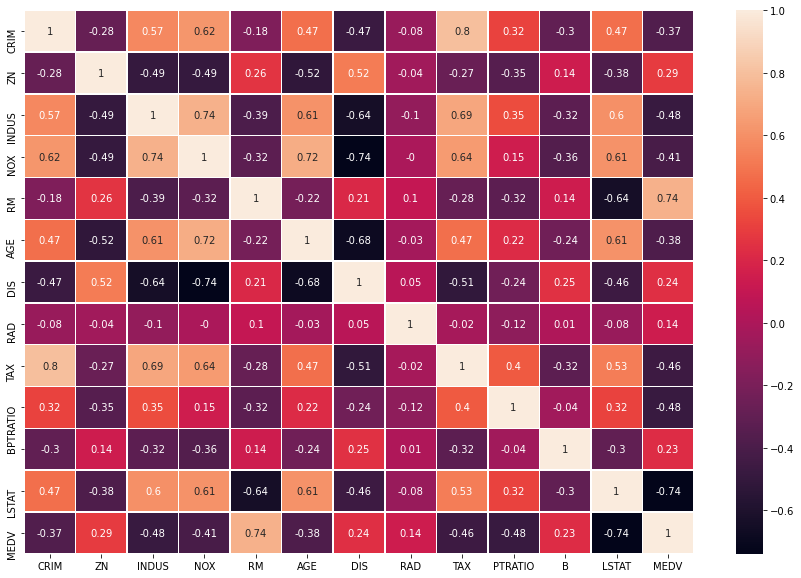

In [15]:
correlation_matrix = data3.corr().round(2)

fig, ax = plt.subplots(figsize=(15,10))

# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

In [16]:
#ATTEMPT2 (without AGE, NOX, INDUS)
x = new_df.drop(columns = ['RAD','CHAS','DIS','B'])
y = data3.iloc[:,-1]
x

,CRIM,ZN,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,222.0,18.7,5.33
...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,273.0,21.0,9.67
502,0.04527,0.0,11.93,0.573,6.120,76.7,273.0,21.0,9.08
503,0.06076,0.0,11.93,0.573,6.976,91.0,273.0,21.0,5.64
504,0.10959,0.0,11.93,0.573,6.794,89.3,273.0,21.0,6.48


In [17]:
#Split into test and training datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=40)
print(x_train.shape); 
print(x_test.shape)

(280, 9)
(138, 9)


In [18]:
x_train

,CRIM,ZN,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT
316,0.31827,0.0,9.90,0.544,5.914,83.2,304.0,18.4,18.33
49,0.21977,0.0,6.91,0.448,5.602,62.0,233.0,17.9,16.20
502,0.04527,0.0,11.93,0.573,6.120,76.7,273.0,21.0,9.08
348,0.01501,80.0,2.01,0.435,6.635,29.7,280.0,17.0,5.99
422,2.04820,0.0,18.10,0.614,5.648,87.6,666.0,20.2,14.10
...,...,...,...,...,...,...,...,...,...
350,0.06211,40.0,1.25,0.429,6.490,44.4,335.0,19.7,5.98
177,0.05425,0.0,4.05,0.510,6.315,73.4,296.0,16.6,6.29
7,0.14455,12.5,7.87,0.524,6.172,96.1,311.0,15.2,19.15
251,0.21409,22.0,5.86,0.431,6.438,8.9,330.0,19.1,3.59


In [19]:
#standardized dataset
# transform data

x_scaled = StandardScaler().fit_transform(x[['CRIM', 'ZN', 'INDUS', 'NOX', 
                                              'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT']])

x_scaled = pd.DataFrame(data=x_scaled, columns=['CRIM', 'ZN', 'INDUS', 'NOX', 
                                                'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT'])

y_df = pd.DataFrame(data=y, columns=['MEDV'])

y_scaled = StandardScaler().fit_transform(y_df)
y_scaled = pd.DataFrame(data=y_scaled, columns=['MEDV'])

In [20]:
x_scaled

,CRIM,ZN,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT
0,-0.602478,0.380992,-1.235202,-0.065391,0.512820,-0.060480,-0.606517,-1.486170,-1.115317
1,-0.593709,-0.498598,-0.536575,-0.693095,0.261605,0.424871,-0.944175,-0.317762,-0.475658
2,-0.593718,-0.498598,-0.536575,-0.693095,1.507896,-0.205731,-0.944175,-0.317762,-1.261393
3,-0.591596,-0.498598,-1.254282,-0.793163,1.202848,-0.747765,-1.069233,0.102865,-1.428996
4,-0.576273,-0.498598,-1.254282,-0.793163,1.445908,-0.450178,-1.069233,0.102865,-1.061500
...,...,...,...,...,...,...,...,...,...
413,-0.578955,-0.498598,0.176728,0.253010,0.542183,0.077685,-0.750334,1.177800,-0.394163
414,-0.586207,-0.498598,0.176728,0.253010,-0.229408,0.346931,-0.750334,1.177800,-0.484884
415,-0.579736,-0.498598,0.176728,0.253010,1.166960,0.853538,-0.750334,1.177800,-1.013833
416,-0.559338,-0.498598,0.176728,0.253010,0.870069,0.793312,-0.750334,1.177800,-0.884671


In [21]:
#Split #standardized dataset into test and training datasets
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(x_scaled, y_scaled, test_size=0.33, random_state=40)
print(x_train_scaled.shape); 
print(x_test_scaled.shape)

(280, 9)
(138, 9)


### Creating the model

The model contains 9 inputs, 16 nodes in layer 1, 32 nodes in layer 2 as well as one output.

**Optimizer** set to rmsprop
**Loss** set to mse (mean squared error).
**Metrics** set to mean average error.

Fitting the model with training data and running for 100 epochs, with a validation split of 0.2.

In [30]:
# Define model1

model = Sequential([
    Dense(16, input_dim=9, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1),
])
#Comments: based on the results of all models developed
#this model gives better results, meaning that the MSE is lower compared to the other ones.

In [31]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [32]:
#Print model Summary
model.summary() 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                160       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 737
Trainable params: 737
Non-trainable params: 0
_________________________________________________________________


In [33]:
result = model.fit(x_train, y_train, epochs=100, validation_split=0.2,verbose=0)

In [34]:
val_loss_score, val_mae_score = model.evaluate(x_test, y_test, verbose=0);
print("Mean Squared Error: {:.2f}\nMean Absolute Error score: {:.2f}".format(val_loss_score, val_mae_score))

Mean Squared Error: 38.60
Mean Absolute Error score: 4.59


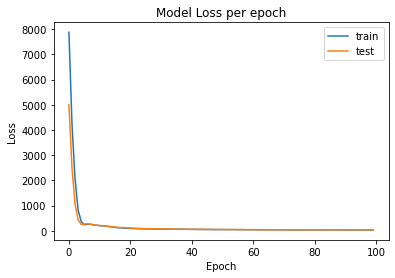

In [35]:
plt.plot(result.history['loss'], label='train')
plt.plot(result.history['val_loss'], label='test')
plt.title('Model Loss per epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#plt.savefig('model_loss_100')

In [36]:
predictions = model.predict(x_test[:50])
temp_label = y_test[:50].tolist()

for i in range(len(predictions)):
    print("Predicted: {:.2f} ||| Real: {:.2f} ||| Difference: {:.2f}".format(predictions[i][0], temp_label[i], (predictions[i][0] - temp_label[i])))

Predicted: 24.99 ||| Real: 22.60 ||| Difference: 2.39
Predicted: 23.67 ||| Real: 24.60 ||| Difference: -0.93
Predicted: 18.17 ||| Real: 14.90 ||| Difference: 3.27
Predicted: 25.89 ||| Real: 34.90 ||| Difference: -9.01
Predicted: 22.19 ||| Real: 30.30 ||| Difference: -8.11
Predicted: 21.98 ||| Real: 17.10 ||| Difference: 4.88
Predicted: 22.45 ||| Real: 23.10 ||| Difference: -0.65
Predicted: 12.27 ||| Real: 21.70 ||| Difference: -9.43
Predicted: 16.13 ||| Real: 16.10 ||| Difference: 0.03
Predicted: 20.02 ||| Real: 17.70 ||| Difference: 2.32
Predicted: 21.65 ||| Real: 25.30 ||| Difference: -3.65
Predicted: 31.21 ||| Real: 33.40 ||| Difference: -2.19
Predicted: 21.44 ||| Real: 24.00 ||| Difference: -2.56
Predicted: 29.24 ||| Real: 36.20 ||| Difference: -6.96
Predicted: 15.95 ||| Real: 18.90 ||| Difference: -2.95
Predicted: 5.69 ||| Real: 14.60 ||| Difference: -8.91
Predicted: 29.03 ||| Real: 28.20 ||| Difference: 0.83
Predicted: 18.52 ||| Real: 14.30 ||| Difference: 4.22
Predicted: 17.79 |